# Thinkful Capstone Analytics Project *ROUGH DRAFT*


### Business Question 1: Why are good employees people leaving their jobs? 


### Business Question 2: When do good, loyal employees tend to leave? Why? 


### Business Question 3: How do we optimize conditions to reduce turnover. Are our incentives to keep high performing employees working? 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
%matplotlib inline

## Previewing Data

In [2]:
#read in .csv
df = pd.read_csv('HR_comma_sep.csv')

#preview first 5 rows of data frame
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [27]:
#Column assignment coventions taken from Randy Lao on Kaggle

df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [4]:
df.shape

(14999, 10)

In [5]:
turnover = df.turnover.value_counts()/14999

In [6]:
turnover

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [7]:
turnover_summary = df.groupby('turnover')
turnover_summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## BQ1: Why are people leaving their jobs?

### Correlation matrix overlooking all data

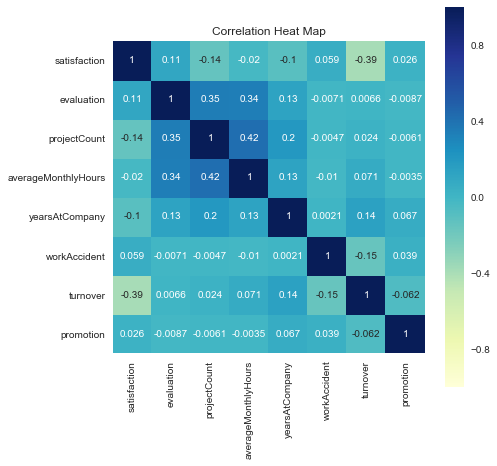

In [105]:
correlation = df.corr()
plt.figure(figsize=(7,7))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap="YlGnBu")
plt.title('Correlation Heat Map')


### Focusing on what really matters: why are GOOD employees leaving (evaluations > .7)?
#### Key factors include project load, time spent on the job and time spent at the company

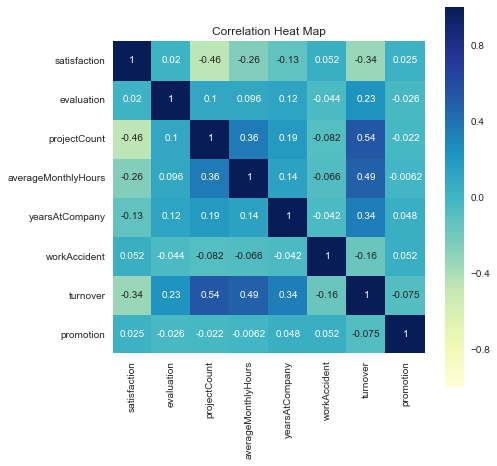

In [40]:
good_employees = df[df['evaluation'] > .7]

plt.figure(figsize=(7,7))
correlation = good_employees.corr()
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap="YlGnBu")
plt.title('Correlation Heat Map')

## Why are good, satisfied employees leaving?

### Key factors remain: attributes associated with work load

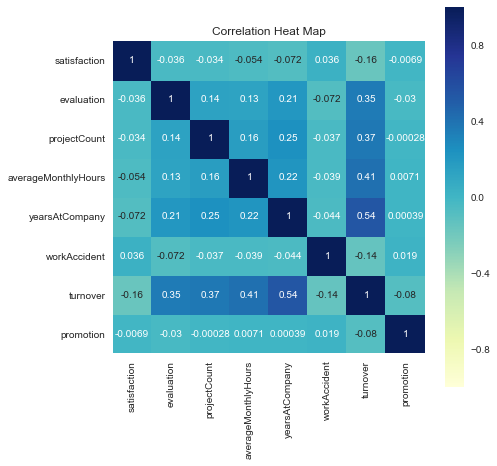

In [41]:
good_employees = df[df['evaluation'] > .7]

satisfied_good_employees = good_employees[good_employees['satisfaction'] > .7]

correlation = satisfied_good_employees.corr()
plt.figure(figsize=(7,7))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap="YlGnBu")
plt.title('Correlation Heat Map')

## Why are good, unsatisfied employees leaving? 

### Key factors remain --> much stronger relationship with turnover. Overall satisfaction also strongly tied to turnover rate.

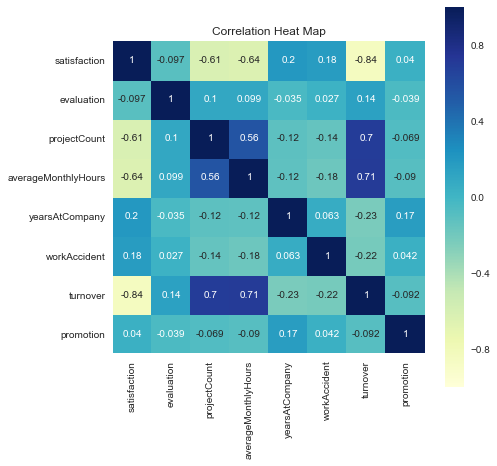

In [42]:
unhappy_good_employees = df[df['evaluation'] > .7]
unhappy_good_employees1 = unhappy_good_employees[unhappy_good_employees['satisfaction'] < .3]

                            
correlation = unhappy_good_employees1.corr()
plt.figure(figsize=(7,7))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap="YlGnBu")
plt.title('Correlation Heat Map')

## BQ2: At what point in their tenure do good employees tend to leave?

### Overlooking all employees, there's a spike at 3 years that tapers off gradually until year 6

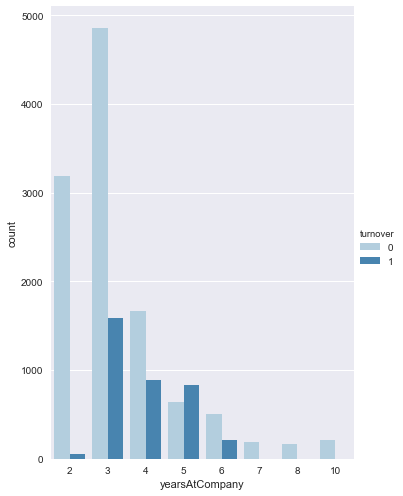

In [108]:
sns.factorplot(x="yearsAtCompany",hue="turnover",data=df,kind="count",size=7,aspect=.7,palette="Blues")


## Highly evaluated employees tend to be retained longer -- until years 4/5

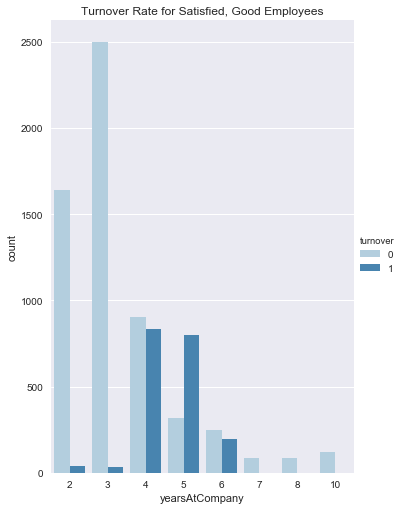

In [107]:
sns.factorplot(x="yearsAtCompany",hue="turnover",data=good_employees,kind="count",size=7,aspect=.7,palette="Blues")
plt.title("Turnover Rate for Satisfied, Good Employees")


## Highly evaluated employees who are also highly satisfied tend to stay even longer -- turnover doesn't spike until year 5

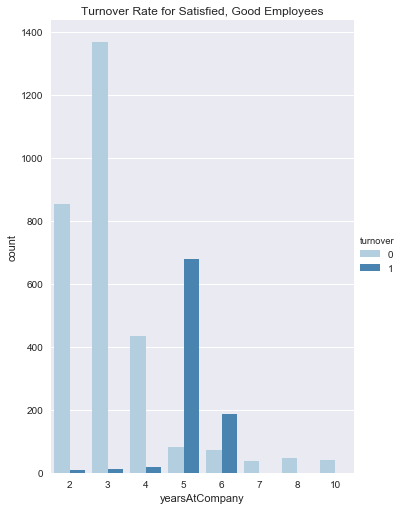

In [106]:
sns.factorplot(x="yearsAtCompany",hue="turnover",data=satisfied_good_employees,kind="count",size=7,aspect=.7,palette="Blues")
plt.title("Turnover Rate for Satisfied, Good Employees")


## Looking at good, satisfied, veteran (>4 years) employees -- why are they leaving (how do we explain the spike?

### Same factors remain prominent -- those who are overworked tend to leave. 

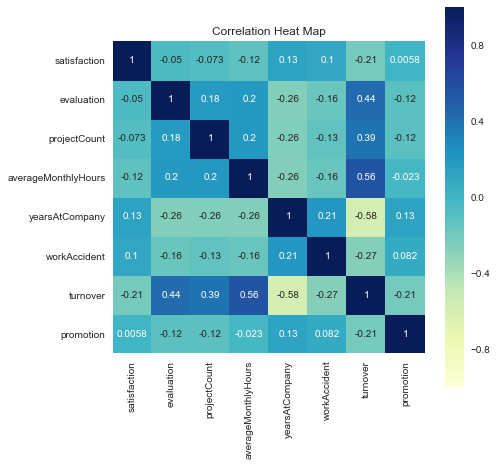

In [43]:
satisfied_good_veteran_employees = satisfied_good_employees[satisfied_good_employees['yearsAtCompany'] > 4]

correlation = satisfied_good_veteran_employees.corr()
plt.figure(figsize=(7,7))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap="YlGnBu")
plt.title('Correlation Heat Map')
                                                            
                                                            

# BQ3: How do we optimize conditions to reduce turnover. Are our incentives to keep high performing employees working? 
## Project Counts
### Highest satisfaction levels maintained at work loads of 3 - 5 projects

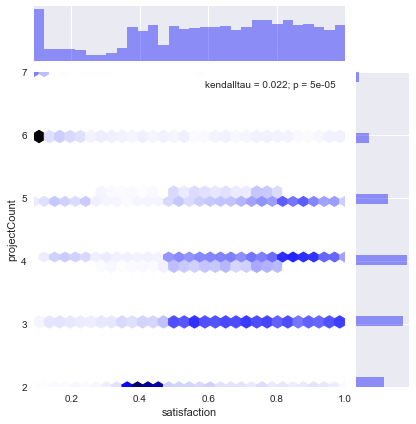

In [91]:
sns.jointplot(x='satisfaction',y='projectCount',data=df,kind="hex",stat_func=kendalltau,color="b")

## Time spent on the job
### Highest satisfaction levels maintained between 170 - 250 average monthly hours

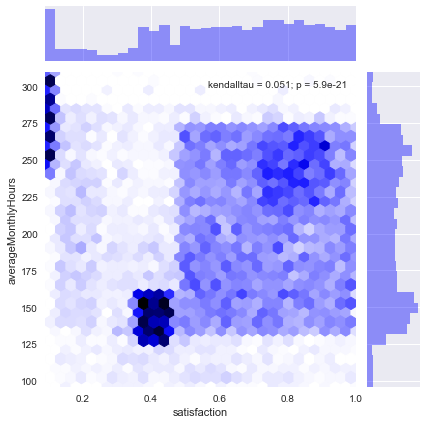

In [92]:
sns.jointplot(x='satisfaction',y='averageMonthlyHours',data=df,kind="hex",stat_func=kendalltau,color="b")

## A look at promotions

### Very few who are promoted leave the company

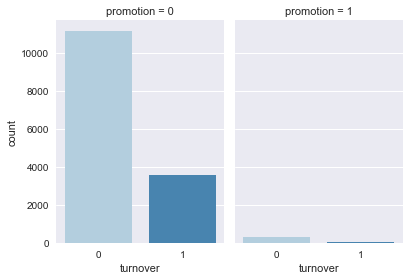

In [82]:
g = sns.factorplot(x="turnover",col="promotion",data=df,kind="count",size=4,aspect=.7,palette="Blues")


## A look at wages

### Retention is highest in those who receive high wages

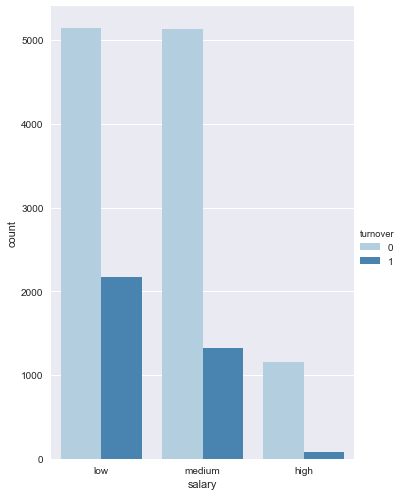

In [83]:
g = sns.factorplot(x="salary",hue="turnover",data=df,kind="count",size=7,aspect=.7,palette="Blues")
